# Hand of God Code 2.0

- Hanan Basheer (20B030018) [Code Master]
- Sidhant Bose (200020140)
- Vinayak Goyal (20d070088)

### Installing required dependencies and modules

In [85]:
import subprocess

def install(name):
    subprocess.call(['pip', 'install', name])

install("matplotlib sklearn tk seaborn pandas serial mouse keyboard pyautogui")

# Restart Notebook after installations are complete

### Importing required libraries

In [86]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import numpy as np
import os
import seaborn as sns
import pandas as pd
import csv
import serial
import time
import keyboard
import pyautogui
import mouse
import warnings
import turtle
from tkinter import *
from PIL import Image, ImageTk
from Graphics import Animations
warnings.filterwarnings('ignore')

### Global Variable definition

In [87]:
push = 0  # Thumb button to push buffer commands through
dt = 0.1

### Arduino Object Creation

In [88]:
# arduino = serial.Serial('COM3', 9600, timeout = dt)

### Training Data extractor from csv file

In [89]:
def built(hand):
    l = []
    l1 = []
    for i in range(1, len(hand)):
       l = l + [[hand[i][0], hand[i][1], hand[i][2], hand[i][3]]]
       l1 = l1 + [[hand[i][4]]]
    return (np.array(l, dtype=list), np.array(l1, dtype=list))

def unique_action(y):
    l = []
    for i in y:
        if i[0] not in l:
            l.append(i[0])
    return l

def get_key(my_dict, val):
    for key, value in my_dict.items():
         if val == value:
             return key

reader = list(csv.reader(open(os.getcwd() + '\\Vol-Ges.csv')))
x, y = built(reader)
actions = unique_action(y)
print("List of actions stored:", actions)

List of actions stored: ['Yo', 'Anti-Yo', 'Closed Hand', 'Open Hand', 'Victory', 'Pointer']


### Creating KNN model and Operations

In [90]:
model = KNeighborsClassifier(n_neighbors = 100)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Prediction functions and Testing prediction

In [91]:
# Single gesture prediction function
def predict(x):
    y = []
    for i in range(len(x)):
        y.append(model.predict([x[i]]))
    return np.array(y)

# Array buider of prediction for creating confusion matrix
def predict_array(x, y_test):
    y = []
    z = list(predict(x))
    for i in range(y_test.shape[0]):
        y += z
    return np.array(y)

### Interface (Button functions)

In [92]:
def fun1():  # Record Hand Gesture
    root = Tk()
    root.title("Record Hand Gesture")
    root.geometry('500x300')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
    data_list = []
    def record_gesture_fun():
        avg_list = [0, 0, 0, 0]
        for i in range(100):
            data = "$$396/210/200/370/500/600/700/800/"  #arduino.readline()
            if (data):
                data = list(map(eval,str(data)[2:-5].split("/")))[0:4]
                data_list.append(data)
                for j in range(len(data)):
                    avg_list[j] += data[j]
                outputs.insert(END, "   Outputs at t = " + str(round(dt * i, 2)) + "  =>  " + str(data[0]) + ", " + str(data[1]) + ", " + str(data[2]) + ", " + str(data[3]))
        avg = [round(x / len(data_list), 1) for x in avg_list]
        output_label = Label(root, text = "Average Voltage Values").place(x = 115, y = 30, relx = 0.5, rely = 0.5, anchor = CENTER)
        output = Label(root, text = str(avg)).place(x = 115, y = 50, relx = 0.5, rely = 0.5, anchor = CENTER)

    parent = Frame(root, padx=10, pady=10)
    parent.pack(fill=BOTH, expand=True)
    entry = Entry(parent)
    entry.place(x = 105, y = -70, relx = 0.5, rely = 0.5, anchor = CENTER)

    def store_gesture_fun():
        action_name = entry.get()
        if (action_name):
            with open(os.getcwd() + '\\Vol-Ges.csv', 'a', encoding='UTF8', newline='') as f:
                writer = csv.writer(f)
                for i in data_list:
                    z = i + [action_name]
                    writer.writerow(z)
            store_label = Label(root, text = "Gesture stored successfully!", font=("Arial", 10), height = 5, fg = "#00b894").place(x = 115, y = 50, relx = 0.5, rely = 0.5, anchor = CENTER)

    scroll_bar = Scrollbar(parent)
    scroll_bar.pack(side = RIGHT, fill = Y)
    outputs = Listbox(parent, yscrollcommand = scroll_bar.set, width = 15)    
    outputs.pack(side = LEFT, fill = Y)
    scroll_bar.config(command = outputs.yview)
    record_button = Button(parent, text='RECORD', command = record_gesture_fun, bg = "#ff7675").place(x = 60, y = -10, relx = 0.5, rely = 0.5, anchor = CENTER)
    store_button = Button(parent, text='STORE', command = store_gesture_fun, bg = "#6c5ce7").place(x = 150, y = -10, relx = 0.5, rely = 0.5, anchor = CENTER)
    root.mainloop()

In [93]:
def fun2():  # Record Command (Sequencing)
    root = Tk()
    root.title("Record Command (Sequencing)")
    root.geometry('550x150')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
    action = []
    def record_command_fun():
        action_number = 1
        for i in range(100):
            data = "$$396/210/200/370/500/600/700/800/"  #arduino.readline()
            if (data):
                data = list(map(eval,str(data)[2:-5].split("/")))[0:4]
                prediction = str(model.predict([data])[0])
                if len(action)>0:
                    if action[-1]!=prediction:
                        action.append(prediction)
                        outputs.insert(END, "  Gesture " + str(action_number) + " Name : " + prediction)
                        action_number += 1
                else:
                    action.append(prediction)
                    outputs.insert(END, "  Gesture " + str(action_number) + " Name : " + prediction)
                    action_number += 1

    parent = Frame(root, padx=10, pady=10)
    parent.pack(fill=BOTH, expand=True)
    entry = Entry(parent)
    entry.place(x = 95, y = -40, relx = 0.5, rely = 0.5, anchor = CENTER)

    def store_command_fun():
        action_name = entry.get()
        dict = {}
        if (action_name):
            with open(os.getcwd() + '\\Commands.txt', 'r', encoding='UTF8', newline='') as f:
                f.seek(0)
                dict = eval(f.readline())
                dict[action_name] = action
            with open(os.getcwd() + '\\Commands.txt', 'w', encoding='UTF8', newline='') as f:
                f.write(str(dict))
            store_label = Label(parent, text = "Gesture stored successfully!", font=("Arial", 10), height = 5, fg = "#00b894").place(x = 85, y = -20, relx = 0.5, rely = 0.5, anchor = CENTER)

    scroll_bar = Scrollbar(parent)
    scroll_bar.pack(side = RIGHT, fill = Y)
    outputs = Listbox(parent, yscrollcommand = scroll_bar.set, width = 20)    
    outputs.pack(side = LEFT, fill = Y)
    scroll_bar.config(command = outputs.yview)
    record_button = Button(parent, text='RECORD', command = record_command_fun, bg = "#ff7675").place(x = 60, y = 10, relx = 0.5, rely = 0.5, anchor = CENTER)
    store_button = Button(parent, text='STORE', command = store_command_fun, bg = "#6c5ce7").place(x = 140, y = 10, relx = 0.5, rely = 0.5, anchor = CENTER)
    root.mainloop()

In [94]:
def fun3():  # Detect Command
    root = Tk()
    root.title("Detect Command")
    root.geometry('750x150')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
    action = []
    
    def detect_command_fun():
        action_number = 1
        for i in range(100):
            data = "$$396/210/200/370/500/600/700/800/"  #arduino.readline()
            if (data):
                data = list(map(eval,str(data)[2:-5].split("/")))[0:4]
                prediction = str(model.predict([data])[0])
                if len(action)>0:
                    if action[-1]!=prediction:
                        action.append(prediction)
                        outputs.insert(END, "  Gesture " + str(action_number) + " Name : " + prediction)
                        action_number += 1
                else:
                    action.append(prediction)
                    outputs.insert(END, "  Gesture " + str(action_number) + " Name : " + prediction)
                    action_number += 1

        with open(os.getcwd() + '\\Commands.txt', 'r', encoding='UTF8', newline='') as f:
            f.seek(0)
            dict = eval(f.readline())
            outputs2.insert(END, get_key(dict, action))

    parent = Frame(root, padx=10, pady=10)
    parent.pack(fill=BOTH, expand=True)

    scroll_bar = Scrollbar(parent)
    scroll_bar.pack(side = RIGHT, fill = Y)
    outputs = Listbox(parent, yscrollcommand = scroll_bar.set, width = 30, justify = LEFT)    
    outputs.pack(side = LEFT, fill = Y)
    outputs2 = Listbox(parent, height = 1, width = 20, justify = CENTER)
    outputs2.place(x = 120, y = 20, relx = 0.5, rely = 0.5, anchor = CENTER)
    command_label = Label(parent, text = "Command :", font=("Arial", 8), height = 5).place(x = 25, y = 20, relx = 0.5, rely = 0.5, anchor = CENTER)
    scroll_bar.config(command = outputs.yview)
    detect_button = Button(parent, text = 'DETECT', command = detect_command_fun, bg = "#6c5ce7").place(x = 145, y = -30, relx = 0.5, rely = 0.5, anchor = CENTER)
    root.mainloop()

In [95]:
def lock():
    failure_max = 3
    passwords = [('zextrex', 'v1itsp21')]

    def make_entry(parent, caption, width=None, **options):
        Label(parent, text=caption).pack(side=TOP)
        entry = Entry(parent, **options)
        if width:
            entry.config(width=width)
        entry.pack(side=TOP, padx=10, fill=BOTH)
        return entry

    def enter(event):
        check_password()

    def check_password(failures=[]):
        if (user.get(), password.get()) in passwords:
            root.destroy()
            print('Logged in')
            fun4()
            return
        failures.append(1)
        if sum(failures) >= failure_max:
            root.destroy()
            raise SystemExit('Unauthorized login attempt')
        else:
            root.title('Try again. Attempt %i/%i' % (sum(failures)+1, failure_max))
        

    root = Tk()
    root.title('Enter your information')
    root.geometry('300x230')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
    parent = Frame(root, padx=10, pady=10)
    parent.pack(fill=BOTH, expand=True)
    user = make_entry(parent, "Developer Username", 16, show='')
    password = make_entry(parent, "Password", 16, show="*")
    b = Button(parent, borderwidth=4, text="Login", width=10, pady=8, command=check_password)
    b.pack(side=BOTTOM)
    password.bind('<Return>', enter)

    user.focus_set()

    parent.mainloop()

In [96]:
def fun4():  # Developer Options
    root = Tk()
    root.title("Record Hand Gesture")
    root.geometry('600x300')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
    def record_gesture_fun():
        for i in range(100):
            data = "$$396/210/200/370/500/600/700/800/"  #arduino.readline()
            outputs.insert(END, "   " + str(data))

    parent = Frame(root, padx=10, pady=10)
    parent.pack(fill=BOTH, expand=True)
    entry = Entry(parent)
    entry.place(x = 115, y = -50, relx = 0.5, rely = 0.5, anchor = CENTER)

    scroll_bar = Scrollbar(parent)
    scroll_bar.pack(side = RIGHT, fill = Y)
    outputs = Listbox(parent, yscrollcommand = scroll_bar.set, width = 25)    
    outputs.pack(side = LEFT, fill = Y)
    scroll_bar.config(command = outputs.yview)
    record_button = Button(parent, text='RECORD', command = record_gesture_fun, bg = "#ff7675").place(x = 120, y = 0, relx = 0.5, rely = 0.5, anchor = CENTER)
    root.mainloop()

In [97]:
def fun5():  # Air Mouse or turtle
    def turtle_fun():
        V1 = 420
        V2 = 250
        V3 = 250
        V4 = 360
        root1 = Tk()
        root1.title("Turtle Canvas")
        root1.geometry('500x500')
        root1.resizable(False, False)
        root1.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
        canvas = Canvas(root1, width = 500, height = 500)      #some problem in turtle debug remain
        canvas.pack()
        t = turtle.RawTurtle(canvas)
        t.color('green')

        while True:
            data1 = "$$500/500/500/500/500/600/700/800/" #arduino.readline()
            if (data1):
                data2 = list(map(eval,str(data1)[2:-5].split("/")))[0:4]
                finger1 = data2[0]
                finger2 = data2[1]
                finger3 = data2[2]
                finger4 = data2[3]

                if (finger3>V3 and finger4>V4):
                    t.right(5)
                    time.sleep(0.1)
                if (finger1>V1):    
                    t.forward(10)
                    time.sleep(0.1)
                if (finger2>V2):
                    t.pendown()
                if (finger2<=V2):
                    t.penup()

            root1.update()

        root1.mainloop()


    def air_mouse():
        V1 = 420
        V2 = 250
        V3 = 250
        V4 = 360

        C1 = 'w'
        C2 = 'a'
        C3 = 's'
        C4 = 'd'
        C5 = 'space'
        
        data1 = '$$400/260/200/200/500/600/700/800/' #arduino.readline()
        if (data1):
            data2 = list(map(eval,str(data1)[2:-5].split("/")))[0:4]
            finger1 = data2[0]
            finger2 = data2[1]
            finger3 = data2[2]
            finger4 = data2[3]

            while True:
                if (finger1>V1 and finger2<V2 and finger3<V3 and finger4<V4):
                    # mouse.move(0, 10, absolute = False, duration = 0.1)
                    pyautogui.press(C1)
                elif (finger1<V1 and finger2>V2 and finger3<V3 and finger4<V4):
                    # mouse.move(0, -10, absolute = False, duration = 0.1)
                    pyautogui.press(C2)
                elif (finger1<V1 and finger2<V2 and finger3>V3 and finger4<V4):
                    # mouse.move(-10, 0, absolute = False, duration = 0.1)
                    pyautogui.press(C3)
                elif (finger1<V1 and finger2<V2 and finger3<V3 and finger4>V4):
                    # mouse.move(10, 0, absolute = False, duration = 0.1)
                    pyautogui.press(C4)
                elif (finger1>V1 and finger2>V2 and finger3>V3 and finger4>V4):
                    pyautogui.press(C5)
                # elif (finger1>V1 and finger2<V2 and finger3>V3 and finger4<V4):
                #     # mouse.move(-10, 10, absolute = False, duration = 0.1)
                # elif (finger1>V1 and finger2<V2 and finger3<V3 and finger4>V4):
                #     # mouse.move(10, 10, absolute = False, duration = 0.1)
                # elif (finger1<V1 and finger2>V2 and finger3>V3 and finger4<V4):
                #     # mouse.move(-10, -10, absolute = False, duration = 0.1)
                # elif (finger1<V1 and finger2>V2 and finger3<V3 and finger4>V4):
                #     # mouse.move(10, -10, absolute = False, duration = 0.1)
                # elif (finger1>V1 and finger2>V2 and finger3<V3 and finger4<V4):
                #     # mouse.click("left")
                # elif (finger1<V1 and finger2<V2 and finger3>V3 and finger4>V4):
                #     # mouse.click("right")

    root = Tk()
    root.title('Select option')
    root.geometry('300x100')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
    parent = Frame(root, padx=10, pady=10)
    parent.pack(fill=BOTH, expand=True)
    b1 = Button(parent,borderwidth = 4, text='Turtle',width = 10, pady = 8, padx = 8, command = turtle_fun)
    b2 = Button(parent,borderwidth = 4, text='Air Mouse',width = 10, pady = 8, padx = 8, command = air_mouse)
    b2.pack(side = RIGHT)
    b1.pack(side = LEFT)
    parent.mainloop()
    


### Interface (Pop-up)

In [98]:
window = Tk()
window.title("Hand of God")
window.geometry('500x500')
window.resizable(False, False)
window.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
lbl = Animations.ImageLabel(window)
lbl.pack()
lbl.load(os.getcwd() + "\\Graphics\\bg.gif")
button_frame = Frame(window).pack()

picture = os.getcwd() + "\\Graphics\\icon.png"
image = Image.open(picture).resize((200, 200), Image.ANTIALIAS)
pic = ImageTk.PhotoImage(image)
panel = Label(window, image = pic)
panel.place(x = 0, y = -125, relx = 0.5, rely = 0.5, anchor = CENTER)

picture2 = os.getcwd() + "\\Graphics\\icon2.png"
image2 = Image.open(picture2).resize((215, 67), Image.ANTIALIAS)
pic2 = ImageTk.PhotoImage(image2)
panel2 = Label(window, image = pic2)
panel2.place(x = 125, y = 200, relx = 0.5, rely = 0.5, anchor = CENTER)

but1 = Button(button_frame, text = "Record Hand Gesture", font=("Lucida Sans", 9), bg = '#0984e3', command = fun1, width = 20, height = 2).place(x = -125, y = 50, relx = 0.5, rely = 0.5, anchor = CENTER)
but2 = Button(button_frame, text = "Record Command", font=("Lucida Sans", 9), bg = '#ff7675', command = fun2, width = 20, height = 2).place(x = -125, y = 125, relx = 0.5, rely = 0.5, anchor = CENTER)
but3 = Button(button_frame, text = "Detect Command", font=("Lucida Sans", 9), bg = '#fdcb6e', command = fun3, width = 20, height = 2).place(x = -125, y = 200, relx = 0.5, rely = 0.5, anchor = CENTER)
but4 = Button(button_frame, text = "Developer Options", font=("Lucida Sans", 9), bg = '#b2bec3', command = lock, width = 20, height = 2).place(x = 125, y = 50, relx = 0.5, rely = 0.5, anchor = CENTER)
but5 = Button(button_frame, text = "Control", font=("Lucida Sans", 9), bg = '#81ecec', command = fun5, width = 20, height = 2).place(x = 125, y = 125, relx = 0.5, rely = 0.5, anchor = CENTER)
credits1 = Label(window, text = "Hand of God", fg = 'white', bg = 'black', font = ("Gabriola 10")).place(x = 125, y = 188, relx = 0.5, rely = 0.5, anchor = CENTER)
credits2 = Label(window, text = "Zextrex Robotics 🤖", fg = 'white', bg = 'black', font = ("Impact 6")).place(x = 125, y = 220, relx = 0.5, rely = 0.5, anchor = CENTER)
window.mainloop()

TclError: expected integer but got "10.5"

### Confusion-matrix of stored data and heat map visualization of hand gesture database

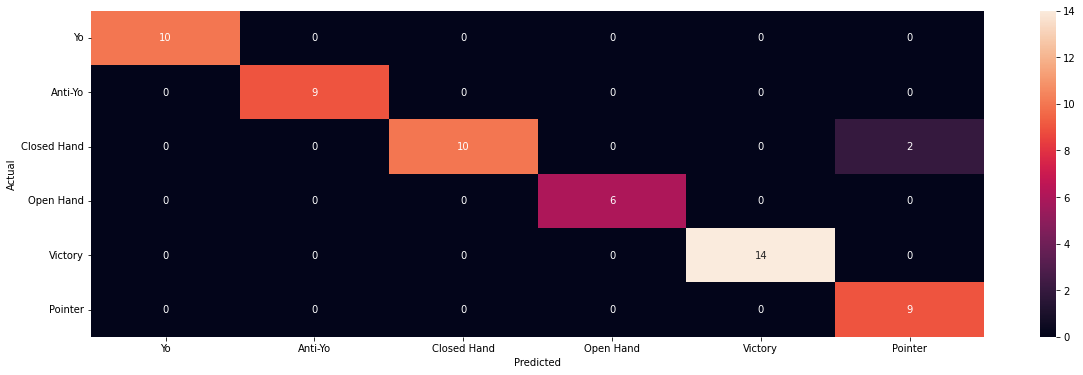

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(20,6))
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = actions, yticklabels = actions)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Confusion-matrix of test case

In [ ]:
x_find = [[366,293,298,372], [397,207,255,372], [397,207,255,340]]
list(model.predict(x_find))

['Yo', 'Open Hand', 'Open Hand']

### Classification report and Accuracies of model

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
Classification Report: 
              precision    recall  f1-score   support

     Anti-Yo       1.00      1.00      1.00        10
 Closed Hand       1.00      1.00      1.00         9
   Open Hand       1.00      0.83      0.91        12
     Pointer       1.00      1.00      1.00         6
     Victory       1.00      1.00      1.00        14
          Yo       0.82      1.00      0.90         9

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



# Updates

## Controls
- Air mouse - Window Destroy
- Turtle - Confirm turtle movement
- Change UI (Button arrangememnt)

## Record Command
- Store Gesture
- On left side, Output should be Hand gestures
- On right side, Remove Avergae Voltages
- Use ML
- Change UI (Make window height less)

## Detect Command

- Use ML
- Change UI (Make window height less)
- Create proper UI interface